In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df=pd.read_csv("./SeatAllocation_data.csv")

In [27]:
def opcl(Institute:str,Seat_Type:str,Gender:str,Academic_Program_Name:str):
    if Gender=='M' or  Gender=='m':
        temp=df[(df["Institute"]==Institute)&(df.Seat_Type==Seat_Type) & (df.Gender!='Female-only (including Supernumerary)') & (df.Academic_Program_Name==Academic_Program_Name)].reset_index()
    else:
        temp=df[(df["Institute"]==Institute)&(df.Seat_Type==Seat_Type)& (df.Gender=='Female-only (including Supernumerary)') & (df.Academic_Program_Name==Academic_Program_Name)].reset_index()
    if len(temp)<1:
        return 
    return temp

In [4]:
inst_list=list(df.Institute.unique())
courses_list=df.Academic_Program_Name.unique()
len(inst_list),len(courses_list)

(119, 241)

In [5]:
inst_list

['Indian Institute of Technology Bhubaneswar',
 'Indian Institute of Technology Bombay',
 'Indian Institute of Technology Mandi',
 'Indian Institute of Technology Delhi',
 'Indian Institute of Technology Indore',
 'Indian Institute of Technology Kharagpur',
 'Indian Institute of Technology Hyderabad',
 'Indian Institute of Technology Jodhpur',
 'Indian Institute of Technology Kanpur',
 'Indian Institute of Technology Madras',
 'Indian Institute of Technology Gandhinagar',
 'Indian Institute of Technology Patna',
 'Indian Institute of Technology Roorkee',
 'Indian School of Mines Dhanbad',
 'Indian Institute of Technology Ropar',
 'Indian Institute of Technology (BHU) Varanasi',
 'Indian Institute of Technology Guwahati',
 'Indian Institute of Technology Bhilai',
 'Indian Institute of Technology Goa',
 'Indian Institute of Technology Palakkad',
 'Indian Institute of Technology Tirupati',
 'Indian Institute of Technology Jammu',
 'Indian Institute of Technology Dharwad',
 'Dr. B R Ambedk

In [30]:
temp=opcl(Institute="Indian Institute of Technology Bombay" ,Seat_Type="OPEN",Quota="AI",Gender="M",Academic_Program_Name="Information Technology (4 Years, Bachelor of Technology)")
temp=temp.sort_values(by='Year')

TypeError: opcl() got an unexpected keyword argument 'Quota'

In [40]:
tmp=df[df.Institute=="Indian Institute of Technology Bombay"]
tmp=tmp[tmp.Academic_Program_Name=="Electrical Engineering (4 Years, Bachelor of Technology)"]
tmp=tmp[tmp.Quota=="AI"]
tmp=tmp[tmp.Seat_Type=="OPEN"]
tmp=tmp[tmp.Gender!="Female-only (including Supernumerary)"]
tmp

,Institute,Academic_Program_Name,Quota,Seat_Type,Gender,Opening_Rank,Closing_Rank,Year
75,Indian Institute of Technology Bombay,"Electrical Engineering (4 Years, Bachelor of T...",AI,OPEN,NaN,22,227,2016
4323,Indian Institute of Technology Bombay,"Electrical Engineering (4 Years, Bachelor of T...",AI,OPEN,NaN,74,266,2017
8602,Indian Institute of Technology Bombay,"Electrical Engineering (4 Years, Bachelor of T...",AI,OPEN,Gender-Neutral,43,265,2018
15336,Indian Institute of Technology Bombay,"Electrical Engineering (4 Years, Bachelor of T...",AI,OPEN,Gender-Neutral,71,296,2019
23615,Indian Institute of Technology Bombay,"Electrical Engineering (4 Years, Bachelor of T...",AI,OPEN,Gender-Neutral,25,298,2020
32606,Indian Institute of Technology Bombay,"Electrical Engineering (4 Years, Bachelor of T...",AI,OPEN,Gender-Neutral,95,434,2021


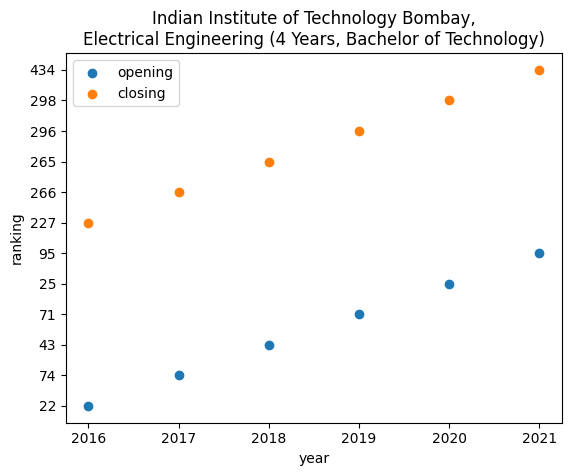

In [43]:
op=tmp.Opening_Rank.values
cl=tmp.Closing_Rank.values
year=tmp.Year.values
plt.title(f'{tmp.Institute.values[0]},\n{tmp.Academic_Program_Name.values[0]}')
plt.xlabel("year")
plt.ylabel("ranking")
plt.scatter(year,op,label="opening")
plt.scatter(year,cl,label="closing")
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'R-squared: {r2:.2f}')

In [93]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x=temp.Year.values
y=temp.Closing_Rank.values

tmp=[]
for i in y:
    tmp.append(int(i))

for i in range(len(x)):


y=np.array(tmp)

x

0 0
1 2017
2 2018
3 2019
4 2020
5 2021


array([   0, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [ ]:

lin_reg = LinearRegression()
lin_reg.fit(x_full, y_full)

print("M ",lin_reg.coef_[0])
print("C ",lin_reg.intercept_)

In [57]:
x_preds=[]
y_preds=[]
for i in range(2016,2022):
    pts= lin_reg.coef_[0]*i+lin_reg.intercept_
    x_preds.append(i)
    y_preds.append(pts)

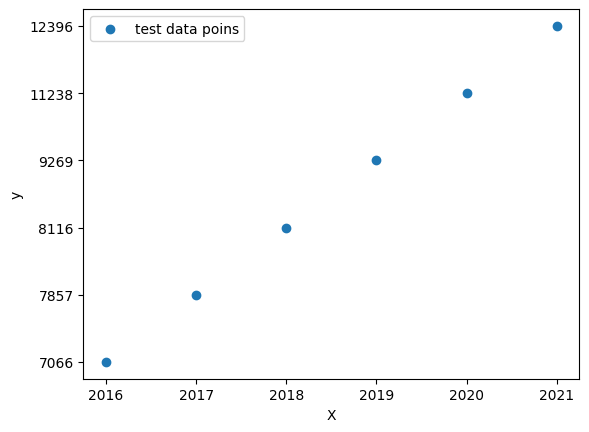

In [61]:
plt.scatter(x_full, y_full,label="test data poins")
# plt.plot(x_preds,y_preds,color='red',label="best fit line")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [69]:
for i in range(6):
    print(f"({x[i]},{y[i]})")

(2016,7066)
(2017,7857)
(2018,8116)
(2019,9269)
(2020,11238)
(2021,12396)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


rvp=pd.read_csv('rvp_cleaned.csv')
print('Create regressors', flush=True)

def create_regressor(rvp_):
    X=rvp_['PERCENTILE'].values.reshape(-1,1)
    y=rvp_['RANK'].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    return regressor

categories = ['GEN', 'EWS', 'SC', 'ST', 'OBC-NCL']
regressors = {
        category : [
            create_regressor(rvp[rvp['CATEGORY']==category]),
            create_regressor(rvp[rvp['CATEGORY']==category + '-PwD'])
            ] for category in categories
        }

def pvr(perc,pwd,category):
    x=pd.Series([perc])
    z=regressors[category][pwd=='YES'].predict(x.values.reshape(-1,1))
    k=float(np.round(z))
    if(k<=0):
        k=15
    return k


In [3]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score

def evaluate_regression_model(  y_test,y_pred):
    # Make predictions on the test data

    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    print('Mean absolute error: ', mae)

    # Calculate the median absolute error
    medae = median_absolute_error(y_test, y_pred)
    print('Median absolute error: ', medae)

    # Calculate the explained variance score
    evs = explained_variance_score(y_test, y_pred)
    print('Explained variance score: ', evs)

    return mae, medae, evs


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

rvp=pd.read_csv('rvp_cleaned.csv')
categories = ['GEN', 'EWS', 'SC', 'ST', 'OBC-NCL']
rvp=rvp[rvp["CATEGORY"]=="GEN"]
X=rvp['PERCENTILE'].values.reshape(-1,1)
y=rvp['RANK'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred= lin_reg.predict(X_test)

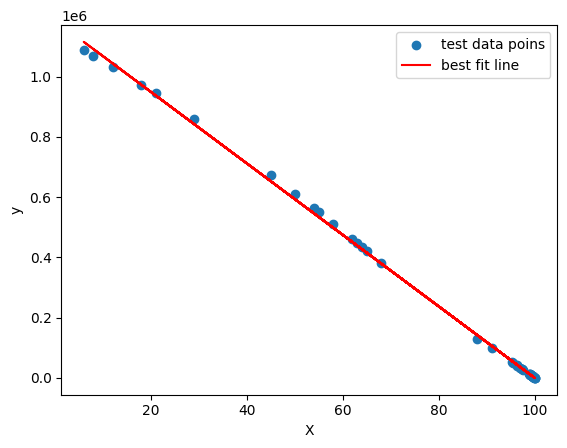

In [6]:
plt.scatter(X_test, y_test,label="test data poins")
plt.plot(X_test,y_pred,color='red',label="best fit line")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [9]:
evaluate_regression_model(  y_test,y_pred)

Mean absolute error:  5166.15234309587
Median absolute error:  1734.0626138008665
Explained variance score:  0.9993669459599939


(5166.15234309587, 1734.0626138008665, 0.9993669459599939)

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

d:\python\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


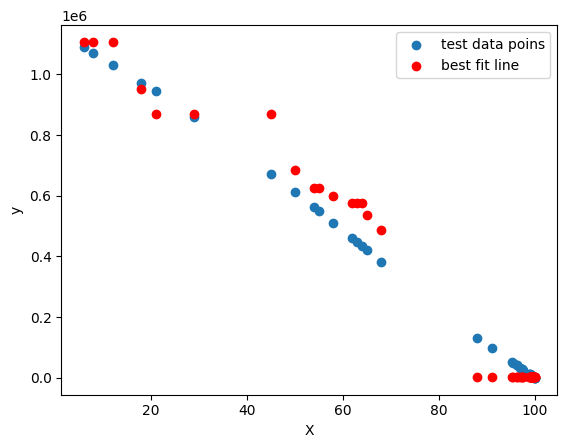

In [11]:
plt.scatter(X_test, y_test,label="test data poins")
plt.scatter(X_test,y_pred,color='red',label="best fit line")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [12]:
evaluate_regression_model(  y_test,y_pred)

Mean absolute error:  39351.4081632653
Median absolute error:  17051.0
Explained variance score:  0.9696561281314806


(39351.4081632653, 17051.0, 0.9696561281314806)

In [13]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

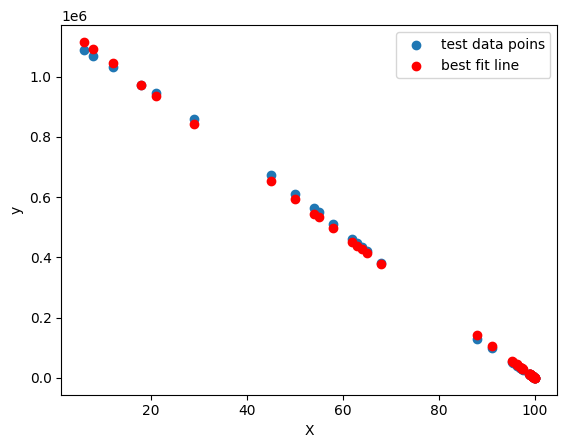

In [14]:
plt.scatter(X_test, y_test,label="test data poins")
plt.scatter(X_test,y_pred,color='red',label="best fit line")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [15]:
evaluate_regression_model(  y_test,y_pred)

Mean absolute error:  5166.382067506187
Median absolute error:  1735.2805588576011
Explained variance score:  0.9993669336185349


(5166.382067506187, 1735.2805588576011, 0.9993669336185349)

In [16]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)


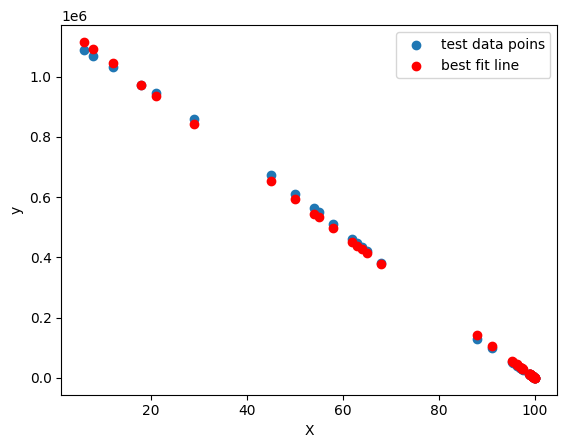

In [17]:
plt.scatter(X_test, y_test,label="test data poins")
plt.scatter(X_test,y_pred,color='red',label="best fit line")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [18]:
evaluate_regression_model(  y_test,y_pred)

Mean absolute error:  5166.156138555869
Median absolute error:  1734.0827364416327
Explained variance score:  0.9993669457565564


(5166.156138555869, 1734.0827364416327, 0.9993669457565564)